# Schroedinger equation numerical solution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.integrate import simpson 

In [6]:
sec = 'cc' # use cc or bb for charmonium and bottomonium respectively
hbc = 0.1973269788
mc = 1.592 # charm mass in RS' scheme at nu_f=0.7gev
mb = 4.949 # bottom mass in RS' scheme at nu_f=0.7gev

sp_tab = np.loadtxt('V0tab_1.txt')      # Load tabulated potential in GeV units
pot = interp1d(sp_tab[:,0],sp_tab[:,1]) # potential function generated interpolating the data

def sctsl(vcc,vbb):  # this function selects values that are different for the two heavy quark sectors
    if sec == 'cc': aux = vcc
    elif sec == 'bb': aux = vbb
    return aux

l: 0, n: 1, nodes: 0, E_b: 0.044, mass: 3.228, <1/r>: 0.670, E_kin: 0.298


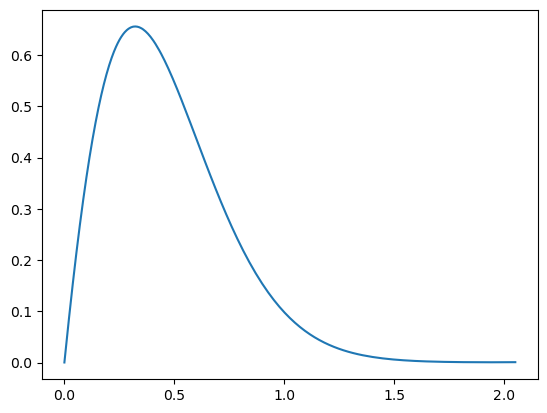

l: 0, n: 2, nodes: 1, E_b: 0.606, mass: 3.790, <1/r>: 0.429, E_kin: 0.443


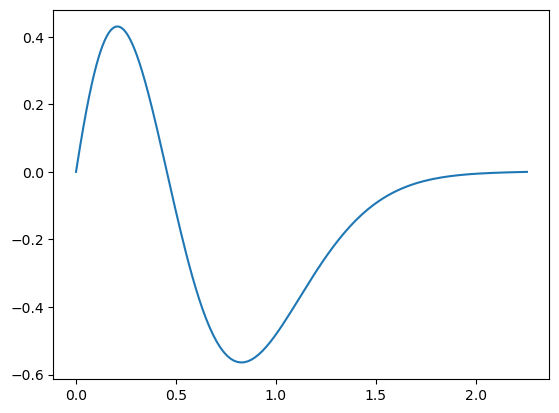

l: 0, n: 3, nodes: 2, E_b: 1.051, mass: 4.235, <1/r>: 0.341, E_kin: 0.579


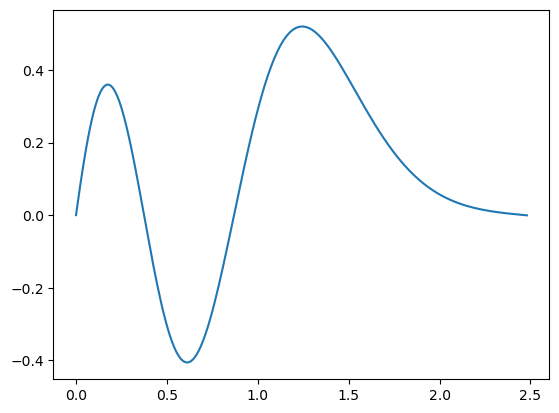

l: 0, n: 4, nodes: 3, E_b: 1.440, mass: 4.624, <1/r>: 0.291, E_kin: 0.703


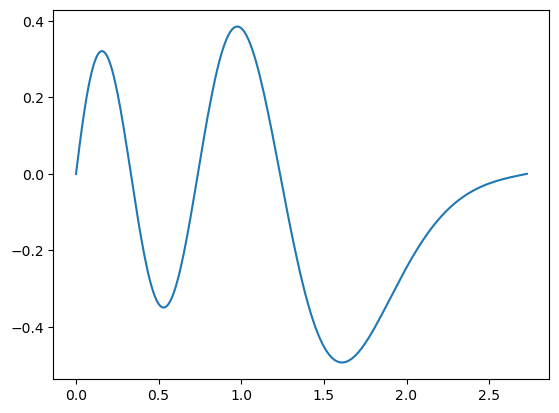

l: 0, n: 5, nodes: 4, E_b: 1.794, mass: 4.978, <1/r>: 0.258, E_kin: 0.818


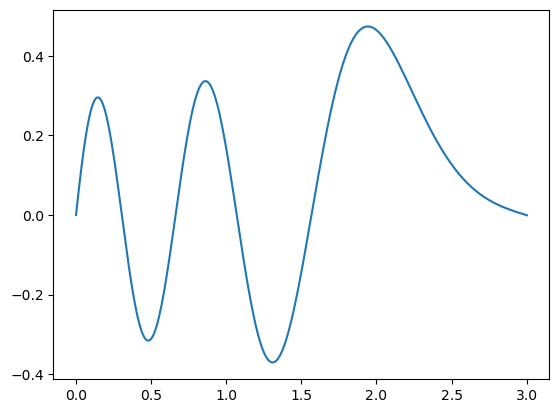

l: 0, n: 6, nodes: 5, E_b: 2.122, mass: 5.306, <1/r>: 0.233, E_kin: 0.925


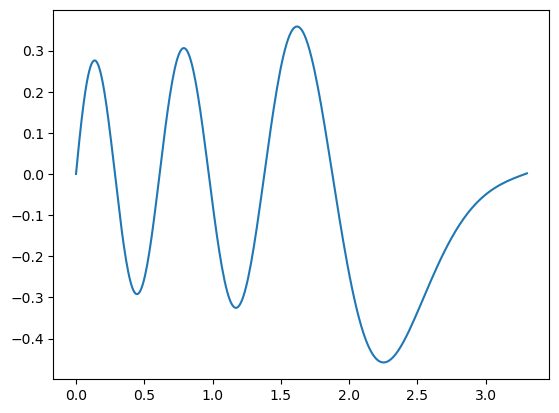

l: 0, n: 7, nodes: 6, E_b: 2.432, mass: 5.616, <1/r>: 0.215, E_kin: 1.025


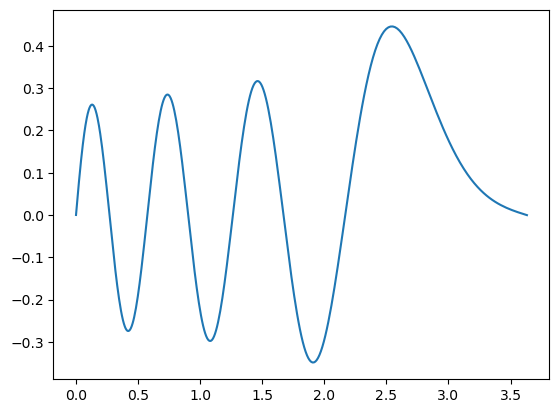

l: 0, n: 8, nodes: 7, E_b: 2.726, mass: 5.910, <1/r>: 0.200, E_kin: 1.121


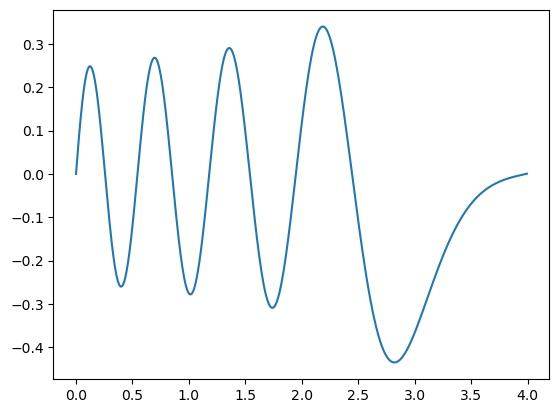

l: 1, n: 1, nodes: 0, E_b: 0.415, mass: 3.599, <1/r>: 0.368, E_kin: 0.358


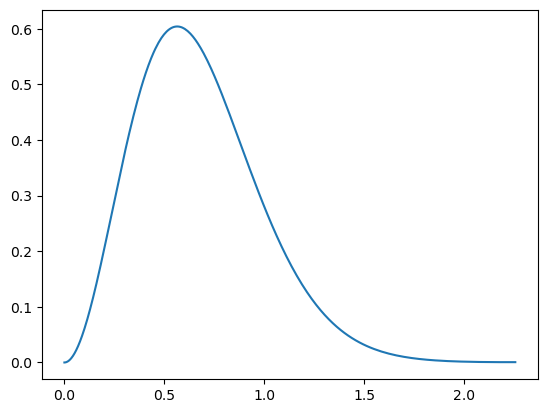

l: 1, n: 2, nodes: 1, E_b: 0.880, mass: 4.064, <1/r>: 0.292, E_kin: 0.507


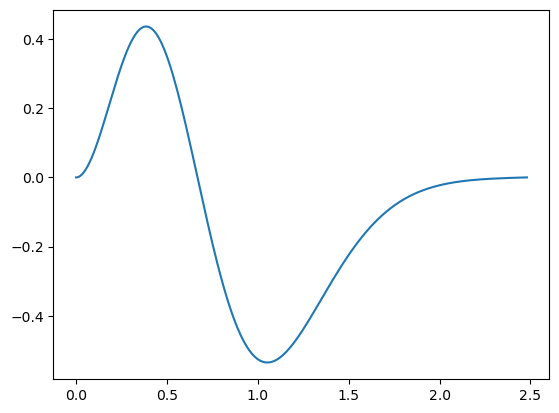

l: 1, n: 3, nodes: 2, E_b: 1.282, mass: 4.466, <1/r>: 0.249, E_kin: 0.638


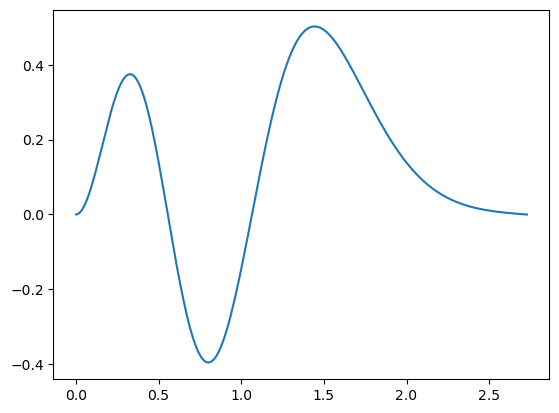

l: 1, n: 4, nodes: 3, E_b: 1.645, mass: 4.829, <1/r>: 0.221, E_kin: 0.757


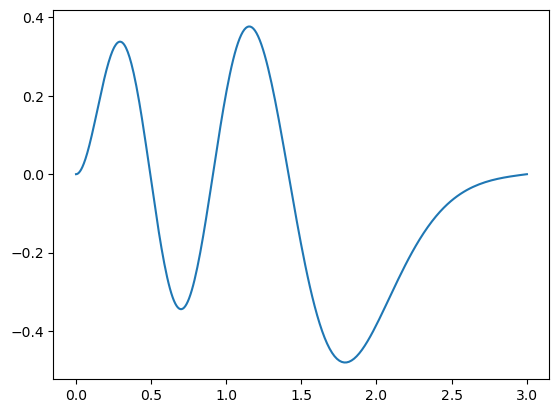

l: 1, n: 5, nodes: 4, E_b: 1.982, mass: 5.166, <1/r>: 0.201, E_kin: 0.868


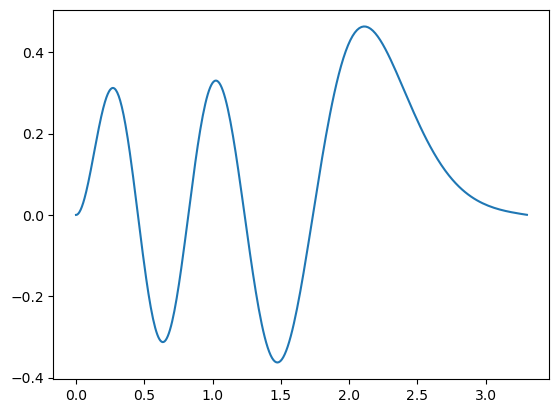

l: 1, n: 6, nodes: 5, E_b: 2.298, mass: 5.482, <1/r>: 0.185, E_kin: 0.972


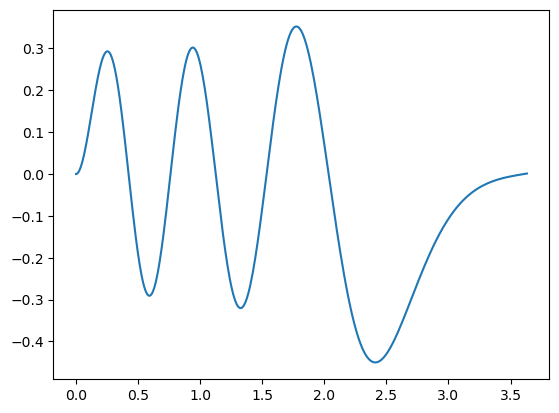

l: 1, n: 7, nodes: 6, E_b: 2.597, mass: 5.781, <1/r>: 0.172, E_kin: 1.071


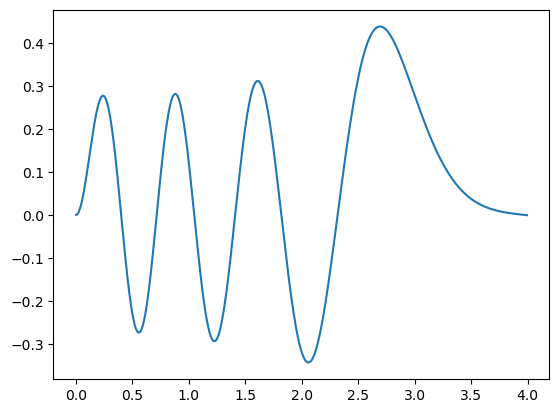

l: 1, n: 8, nodes: 7, E_b: 2.883, mass: 6.067, <1/r>: 0.162, E_kin: 1.165


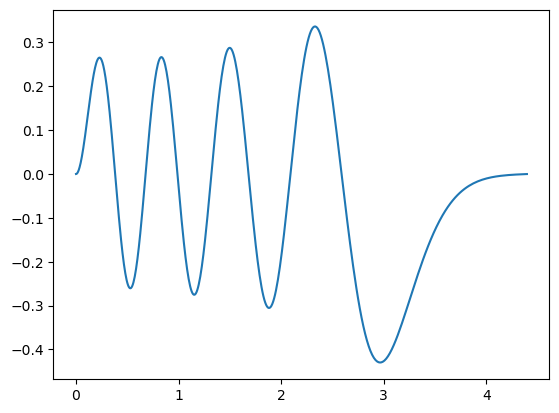

l: 2, n: 1, nodes: 0, E_b: 0.696, mass: 3.880, <1/r>: 0.272, E_kin: 0.437


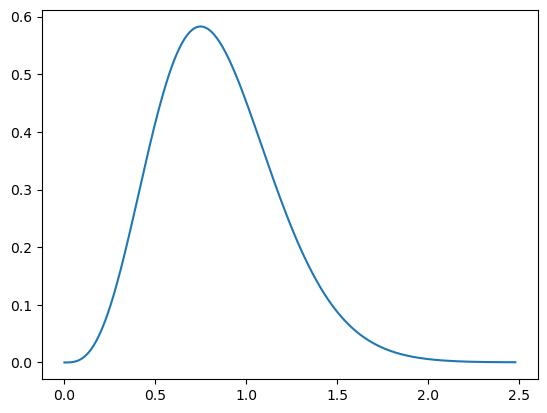

l: 2, n: 2, nodes: 1, E_b: 1.115, mass: 4.299, <1/r>: 0.232, E_kin: 0.575


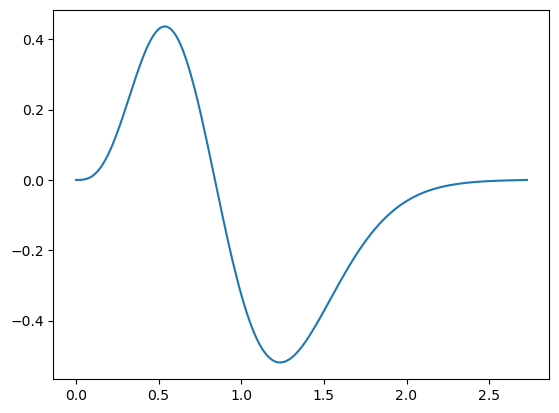

l: 2, n: 3, nodes: 2, E_b: 1.490, mass: 4.674, <1/r>: 0.205, E_kin: 0.699


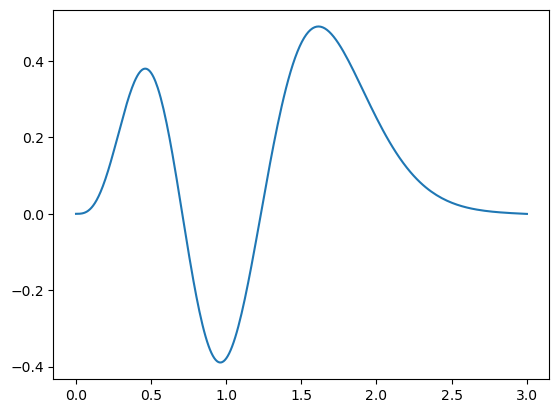

l: 2, n: 4, nodes: 3, E_b: 1.835, mass: 5.019, <1/r>: 0.186, E_kin: 0.813


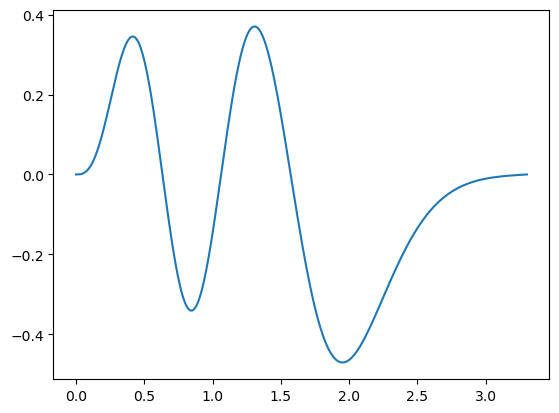

l: 2, n: 5, nodes: 4, E_b: 2.158, mass: 5.342, <1/r>: 0.171, E_kin: 0.920


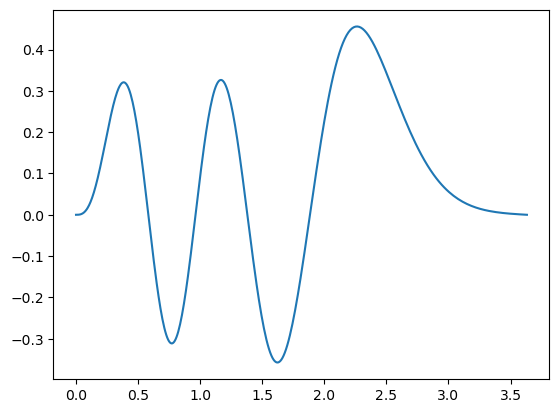

l: 2, n: 6, nodes: 5, E_b: 2.463, mass: 5.647, <1/r>: 0.160, E_kin: 1.022


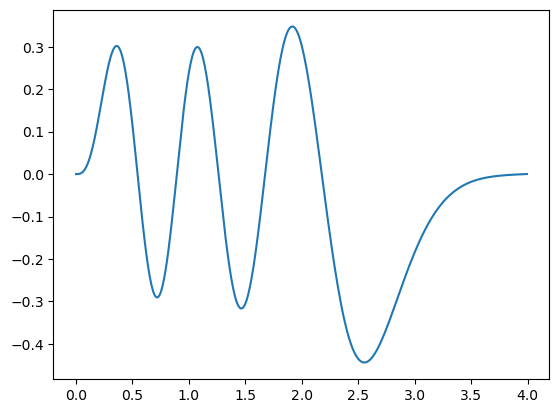

l: 2, n: 7, nodes: 6, E_b: 2.754, mass: 5.938, <1/r>: 0.150, E_kin: 1.118


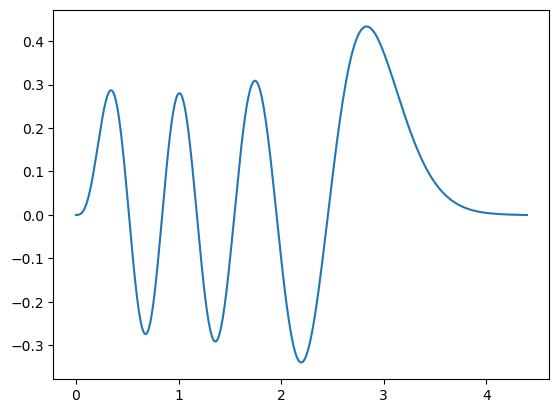

l: 2, n: 8, nodes: 7, E_b: 3.033, mass: 6.217, <1/r>: 0.142, E_kin: 1.211


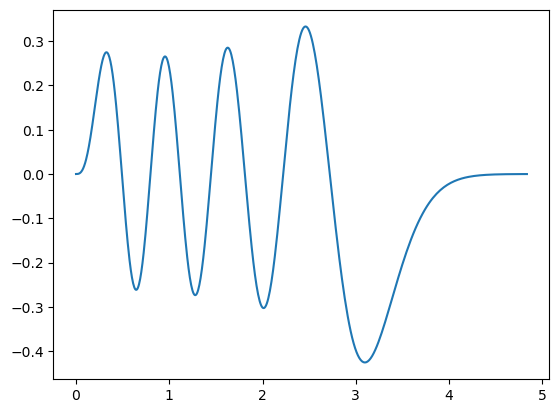

In [7]:
mq = sctsl(mc, mb) # picks heavy quark mass 

# Each step in the loop increses the energy tested by stp*10**(-sf)

stp = 1 # order 1 factor multipling the energy step
sf = 1  # scale factor controling the order of magnitude of the initial steps (now set to 0.1)
sd = 8  # significant digits in the final results of the energies (more or less...). More is needed for larger maxr
spec = []

for l in range(0,3): # We loop over angular momentum 0,1,2; to be adjusted as needed
    en = -1    # Starting energy for the scan
    for n in range(1,9):  # We loop over principal quarntum number n=1..8; to be adjusted as needed
        
        # Minimum value of the range of r for which we will solve the Schroedinger eq. Must be larger than r of the first data 
        # point of the potential.
            
        minr = 10**(-4+l/4)
        
        # Maximum value of the range of r. Ideally the larger the better, however larg values result in the need to find the
        # eigenenergies with unpractical accuracies. The most practial max r is just a few tens of a fm beyond where the wave 
        # function becomes almost zero, which I determine by trial an error and cheking the resulting wave functions. For 
        # increasing n and l we expect the extension of the wave function to increase. However, the scalings are also obtained  
        # by trial an error (maybe exact solutions of linear potentials could be used as a guide too?).
        
        maxr = sctsl(2.05*(1.1**(n-1))*(1.1**l)/hbc,1.3*(1.13**(n-1))*(1.08**l)/hbc)
        
        r_range =  [minr, maxr]
        
        # Boundary conditions of the r.w.f. and its derivative. These are obtained from the solution for the schroedinger
        # eq. in the short distance
        
        y_minr = [minr**(l+1),(l+1)*minr**l]
        
        # We rewrite the schroedinger eq. into a linear system y'=func(r,y)
        
        def func(r,y):
            return [y[1], (mq*(pot(r)-en)+l*(l+1)/r**2)*y[0]]   # y[0]= psi(r) (*reduced* w.f.) y[1]= psi(r)'
                 
        # we solve the diff. eq. for the initial value and find the sign of the divergence
        
        in_psi = solve_ivp(func,r_range,y_minr, rtol=10**(-sd-1), atol=10**(-sd-1)) 
        ref_sgn = np.sign(in_psi.y[0][-1]) 
        
        # Now we start the loop that scans the energy (from the initial value and incresing) until it finds an eigenenergy up to
        # some accuracy
        
        while True:
            en = en + stp*10**(-sf) # Adding energy step
            psi = solve_ivp(func,r_range,y_minr, rtol=10**(-sd-1), atol=10**(-sd-1), events = lambda r, y : y[0]) # Solve diff.eq. for the energy of the step
            ref = np.absolute(psi.y[0][-2])/np.nanmax(np.absolute(psi.y[0])) # value of the r.w.f. at the edge of the range over it max.value
            sgn = np.sign(psi.y[0][-2]) # sign of the r.w.f at the edge of the r range

            if ref < 1e-3: # We approximate the eigenenergy by the value of en when ref is this small
                break      # We exit the loop
            if sf == sd:   # We exit the loop if the number of significat digits of the energy becomes too large
                print('Precision Reached!') # if this prints the convergences conditions are too harsh
                break
            if sgn != ref_sgn: # If the sign of the large r divergence changes means we have crossed an eigenvalue
                en = en - stp*10**(-sf) # Undo the last energy step
                sf=sf+1 # We increase the scale factor so the next energy step is one order of magnitude smaller.
        
        nzeros= psi.t_events[0].size # should count the nodes, but its not working cos at large r r.w.f is very close to 0
        
        # we normalize the r.w.f
        norm = np.sqrt(simpson(psi.y[0]**2,psi.t)) 
        npsi = psi.y[0]/norm
        
        # We compute the number of nodes by counting adjacent points in the determinant with different sign
        nodes = np.sum(npsi[0:-51]*npsi[1:-50] < 0)
        # warning message if the number of nodes is not what it should be
        if nodes != n-1:
            print('Incorrect number of nodes')
        
        # Computing <1/r> and <E_kinetic>
        oor = simpson(npsi**2/psi.t,psi.t)
        kin = en - simpson(npsi**2*pot(psi.t),psi.t)
        
        # Saving the wave fucntion in files
        np.savetxt(sec+'/wf_'+sec+'_'+str(l)+str(n)+'.txt', np.column_stack((psi.t, npsi)), fmt='% 6.5f', delimiter='  ') # save r.w.f
        
        # Saving the states properties to dump in a file later
        spec.append([l, n, en, en + 2*mq, oor, kin])
        
        # Printing state properties and wave fucntions for checks
        print('l: {:1d},'.format(l),
              'n: {:1d},'.format(n),
              'nodes: {:1d},'.format(nodes),
              'E_b: {:.3f},'.format(en),
              'mass: {:.3f},'.format(2*mq+en),
              '<1/r>: {:.3f},'.format(oor),
              'E_kin: {:.3f}'.format(kin))
        
        plt.plot(psi.t*hbc,npsi)
        plt.show()
        
        # Preparing to obtain the next state in the spectrum
        en = en + np.absolute(en)*0.01 # Jump the energy past the eigenvalue so the next loop looks for a higher energy one
        sf = 1 # reset the scale factor for the next loop

# Saving the state data in a file  
aux = pd.DataFrame(spec, columns =  ['l','n','E0[GeV]','M[GeV] ','<1/r>  ','Ek[GeV]'])
aux.to_csv(sec+'/spec'+sec+'.txt', sep = '\t', float_format='% .4f', index=False)  # save spectrum data into a file